# Extracted json Exploration

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import plotly.express as px
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing script modules from ../scripts
# Adding scripts path
import sys, os
sys.path.insert(0, '../scripts/')
from data_preProcessing import data_preProcessing_script
from data_manipulator import DataCleaner
from data_exploration import exploration

# Load Data

In [3]:
df = pd.read_csv("../data/extracted_cmp_data.csv")
df.head()

,game_key,labels_engagement,labels_clickthr,text_engagement,text_clickthr,colors_engagement_red,colors_engagement_green,colors_engagement_blue,colors_engagement_proportion,colors_engagement_saturation,...,colors_clickthr_green,colors_clickthr_blue,colors_clickthr_proportion,colors_clickthr_saturation,colors_clickthr_luminosity,videosd,eng_type,direction,adunit_sizex,adunit_sizey
0,f910338e60315f02812b05e932068f47/1028d033d74dd...,"Asphalt,Tarmac,Road,Runway","Asphalt,Tarmac,Road,Runway","Amazing Hong Kong,air,deals!,Swipe Up,BEST,OF ...","Amazing Hong Kong,air,deals!,Swipe Up,BEST,OF ...",153.0,154.0,167.0,0.219551,0.073684,...,NaN,NaN,NaN,NaN,NaN,0,swipe,up,NaN,NaN
1,444e104ea378baae87997c41eec5b2ff/9e1c545a4b490...,NaN,NaN,"OREO BIEDO,BSEEJOREO,OREO,...,1997 Nintendo, C...","OREO BIEDO,BSEEJOREO,OREO,...,1997 Nintendo, C...",2.0,91.0,173.0,0.164263,0.977143,...,NaN,NaN,NaN,NaN,NaN,0,NaN,no direction,NaN,NaN
2,444e104ea378baae87997c41eec5b2ff/e7370ccd417a5...,NaN,NaN,"OREO DD,BSELEIJOREO,OREO ...,1997 Nintendo, Cr...","OREO DD,BSELEIJOREO,OREO ...,1997 Nintendo, Cr...",2.0,91.0,173.0,0.164263,0.977143,...,NaN,NaN,NaN,NaN,NaN,0,NaN,no direction,NaN,NaN
3,988c2b4ece7a909bccc88bc7d3168348/a034c30acd465...,"Person,Human,Face,Dating","Symbol,Trademark,Logo,Outer Space,Night,Moon,U...",1001,"D 10%,0))),COFFEE,210%E7 0%,,50,HSBC,#,Issued ...",176.0,164.0,153.0,0.141137,0.127072,...,252.0,252.0,0.246394,0.200000,0.990196,0,NaN,no direction,600.0,900.0
4,988c2b4ece7a909bccc88bc7d3168348/8fd373d2d72b9...,"Human,Person,Face,Dating","Symbol,Logo,Trademark,Outdoors,Night,Universe,...",10,"D 10%,0))),COFFEE,210%E7 0%,,50,HSBC,#,Issued ...",160.0,124.0,104.0,0.157609,0.227642,...,251.0,251.0,0.239871,0.142857,0.986275,0,NaN,no direction,600.0,900.0


# Data Information

In [4]:
preprocess = data_preProcessing_script(df)
preprocess.show_data_information()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   game_key                      1001 non-null   object 
 1   labels_engagement             926 non-null    object 
 2   labels_clickthr               994 non-null    object 
 3   text_engagement               992 non-null    object 
 4   text_clickthr                 1001 non-null   object 
 5   colors_engagement_red         995 non-null    float64
 6   colors_engagement_green       995 non-null    float64
 7   colors_engagement_blue        995 non-null    float64
 8   colors_engagement_proportion  995 non-null    float64
 9   colors_engagement_saturation  995 non-null    float64
 10  colors_engagement_luminosity  995 non-null    float64
 11  colors_clickthr_red           910 non-null    float64
 12  colors_clickthr_green         910 non-null    float64
 13  col

In [11]:
print('unique column values')
df.apply(lambda x: len(x.unique())).sort_values(ascending=False).head(33)

unique column values


game_key                        1001
labels_clickthr                  917
text_clickthr                    896
colors_clickthr_proportion       883
text_engagement                  776
colors_engagement_proportion     706
labels_engagement                608
colors_engagement_saturation     458
colors_clickthr_saturation       390
colors_engagement_luminosity     350
colors_clickthr_luminosity       294
colors_engagement_red            200
colors_engagement_green          200
colors_engagement_blue           195
colors_clickthr_green            183
colors_clickthr_red              181
colors_clickthr_blue             172
eng_type                           5
direction                          5
adunit_sizey                       5
adunit_sizex                       3
videosd                            2
dtype: int64

In [12]:
df.columns

Index(['game_key', 'labels_engagement', 'labels_clickthr', 'text_engagement',
       'text_clickthr', 'colors_engagement_red', 'colors_engagement_green',
       'colors_engagement_blue', 'colors_engagement_proportion',
       'colors_engagement_saturation', 'colors_engagement_luminosity',
       'colors_clickthr_red', 'colors_clickthr_green', 'colors_clickthr_blue',
       'colors_clickthr_proportion', 'colors_clickthr_saturation',
       'colors_clickthr_luminosity', 'videosd', 'eng_type', 'direction',
       'adunit_sizex', 'adunit_sizey'],
      dtype='object')

In [6]:
df.shape

(1001, 22)

# Data Manipulation

## Missing Value Manipulation

In [7]:
preprocess.colums_WithMissingValue()

['labels_engagement',
 'labels_clickthr',
 'text_engagement',
 'colors_engagement_red',
 'colors_engagement_green',
 'colors_engagement_blue',
 'colors_engagement_proportion',
 'colors_engagement_saturation',
 'colors_engagement_luminosity',
 'colors_clickthr_red',
 'colors_clickthr_green',
 'colors_clickthr_blue',
 'colors_clickthr_proportion',
 'colors_clickthr_saturation',
 'colors_clickthr_luminosity',
 'eng_type',
 'adunit_sizex',
 'adunit_sizey']

In [8]:
preprocess.get_column_based_missing_percentage()

,total_missing_values,missing_percentage
game_key,0,0.0 %
labels_engagement,75,7.49 %
labels_clickthr,7,0.7 %
text_engagement,9,0.9 %
text_clickthr,0,0.0 %
colors_engagement_red,6,0.6 %
colors_engagement_green,6,0.6 %
colors_engagement_blue,6,0.6 %
colors_engagement_proportion,6,0.6 %
colors_engagement_saturation,6,0.6 %


Text(0, 0.5, 'Features')

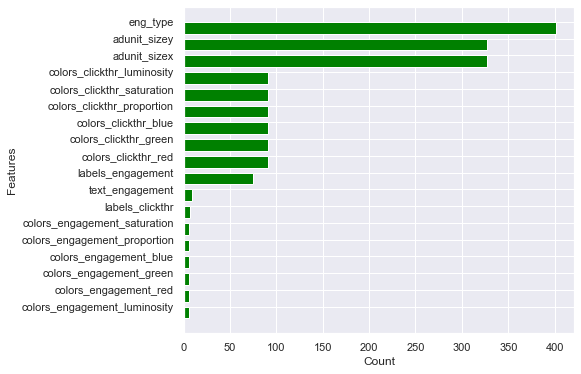

In [10]:
#cols_with_missing = [col for col in train.columns if train[col].isnull().any()]
cols_with_missing = df.isnull().sum()
cols_with_missing = cols_with_missing[cols_with_missing>0]
cols_with_missing.sort_values(inplace=True)
fig, ax = plt.subplots(figsize=(7,6))  
width = 0.70 # the width of the bars 
ind = np.arange(len(cols_with_missing))  # the x locations for the groups
ax.barh(ind, cols_with_missing, width, color="green")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(cols_with_missing.index, minor=False)
plt.xlabel('Count')
plt.ylabel('Features') 

## Fixing missing values

In [15]:
df['labels_engagement'].fillna(df['labels_engagement'].mode()[0], inplace = True) 
df['labels_clickthr'].fillna(df['labels_clickthr'].mode()[0], inplace = True) 
df['text_engagement'].fillna(df['text_engagement'].mode()[0], inplace = True) 
df['eng_type'].fillna(df['eng_type'].mode()[0], inplace = True) 
# 
df['colors_engagement_red'].fillna(df['colors_engagement_red'].median(), inplace = True)
df['colors_engagement_green'].fillna(df['colors_engagement_green'].median(), inplace = True)
df['colors_engagement_blue'].fillna(df['colors_engagement_blue'].median(), inplace = True)
df['colors_engagement_proportion'].fillna(df['colors_engagement_proportion'].median(), inplace = True)
df['colors_engagement_saturation'].fillna(df['colors_engagement_saturation'].median(), inplace = True)
df['colors_engagement_luminosity'].fillna(df['colors_engagement_luminosity'].median(), inplace = True)
# 
df['colors_clickthr_red'].fillna(df['colors_clickthr_red'].median(), inplace = True)
df['colors_clickthr_green'].fillna(df['colors_clickthr_green'].median(), inplace = True)
df['colors_clickthr_blue'].fillna(df['colors_clickthr_blue'].median(), inplace = True)
df['colors_clickthr_proportion'].fillna(df['colors_clickthr_proportion'].median(), inplace = True)
df['colors_clickthr_saturation'].fillna(df['colors_clickthr_saturation'].median(), inplace = True)
df['colors_clickthr_luminosity'].fillna(df['colors_clickthr_luminosity'].median(), inplace = True)
# 
df['adunit_sizex'].fillna(df['adunit_sizex'].median(), inplace = True)
df['adunit_sizey'].fillna(df['adunit_sizey'].median(), inplace = True)

In [16]:
preprocess.get_column_based_missing_percentage()

,total_missing_values,missing_percentage
game_key,0,0.0 %
labels_engagement,0,0.0 %
labels_clickthr,0,0.0 %
text_engagement,0,0.0 %
text_clickthr,0,0.0 %
colors_engagement_red,0,0.0 %
colors_engagement_green,0,0.0 %
colors_engagement_blue,0,0.0 %
colors_engagement_proportion,0,0.0 %
colors_engagement_saturation,0,0.0 %


# Droping Duplicate values

In [17]:
# Duplicate
df[df.duplicated()].index

Int64Index([], dtype='int64')

In [18]:
preprocess.drop_duplicates()

# Show Data Description

In [19]:
preprocess.show_data_description()

,colors_engagement_red,colors_engagement_green,colors_engagement_blue,colors_engagement_proportion,colors_engagement_saturation,colors_engagement_luminosity,colors_clickthr_red,colors_clickthr_green,colors_clickthr_blue,colors_clickthr_proportion,colors_clickthr_saturation,colors_clickthr_luminosity,videosd,adunit_sizex,adunit_sizey
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,129.588412,127.314685,127.184815,0.383340,0.346110,0.502688,133.417582,134.005994,122.037962,0.335448,0.268700,0.508402,0.533467,599.700300,800.149850
std,102.578119,99.426072,100.509874,0.187598,0.359098,0.369339,96.343393,92.379240,95.656221,0.173761,0.287375,0.352617,0.499128,9.482093,176.670534
min,0.000000,0.000000,0.000000,0.130435,0.000000,0.000000,0.000000,0.000000,0.000000,0.128646,0.000000,0.000000,0.000000,300.000000,250.000000
25%,21.000000,26.000000,22.000000,0.222826,0.000000,0.145098,43.000000,45.000000,37.000000,0.212432,0.037037,0.229412,0.000000,600.000000,500.000000
50%,128.000000,123.000000,114.000000,0.343750,0.230769,0.456863,114.000000,112.000000,81.000000,0.289765,0.200000,0.400980,1.000000,600.000000,900.000000
75%,240.000000,234.000000,238.000000,0.534970,0.614754,0.905882,243.000000,233.000000,235.000000,0.388571,0.333333,0.905882,1.000000,600.000000,900.000000
max,255.000000,255.000000,255.000000,0.892708,1.000000,1.000000,254.000000,254.000000,255.000000,0.951481,1.000000,0.996078,1.000000,600.000000,1200.000000


In [20]:
#Knowing the shapes of our datasets
print('Shapes of our datasets')
print('-----------------------')
print(f'Training dataset:{df.shape}')

Shapes of our datasets
-----------------------
Training dataset:(1001, 22)


# Outliers

In [21]:
from data_exploration import exploration
exploration = exploration()

In [22]:
from data_manipulator import DataCleaner
manipulator = DataCleaner(df)

In [24]:
columns = ['colors_engagement_red', 'colors_engagement_green',
       'colors_engagement_blue', 'colors_engagement_proportion',
       'colors_engagement_saturation', 'colors_engagement_luminosity',
       'colors_clickthr_red', 'colors_clickthr_green', 'colors_clickthr_blue',
       'colors_clickthr_proportion', 'colors_clickthr_saturation',
       'colors_clickthr_luminosity',
       'adunit_sizex', 'adunit_sizey']
manipulator.replace_outlier_with_median(df, columns)

,game_key,labels_engagement,labels_clickthr,text_engagement,text_clickthr,colors_engagement_red,colors_engagement_green,colors_engagement_blue,colors_engagement_proportion,colors_engagement_saturation,...,colors_clickthr_green,colors_clickthr_blue,colors_clickthr_proportion,colors_clickthr_saturation,colors_clickthr_luminosity,videosd,eng_type,direction,adunit_sizex,adunit_sizey
0,f910338e60315f02812b05e932068f47/1028d033d74dd...,"Asphalt,Tarmac,Road,Runway","Asphalt,Tarmac,Road,Runway","Amazing Hong Kong,air,deals!,Swipe Up,BEST,OF ...","Amazing Hong Kong,air,deals!,Swipe Up,BEST,OF ...",153.0,154.0,167.0,0.219551,0.073684,...,112.0,81.0,0.289765,0.200000,0.400980,0,swipe,up,600.0,900.0
1,444e104ea378baae87997c41eec5b2ff/9e1c545a4b490...,Text,Text,"OREO BIEDO,BSEEJOREO,OREO,...,1997 Nintendo, C...","OREO BIEDO,BSEEJOREO,OREO,...,1997 Nintendo, C...",2.0,91.0,173.0,0.164263,0.977143,...,112.0,81.0,0.289765,0.200000,0.400980,0,swipe,no direction,600.0,900.0
2,444e104ea378baae87997c41eec5b2ff/e7370ccd417a5...,Text,Text,"OREO DD,BSELEIJOREO,OREO ...,1997 Nintendo, Cr...","OREO DD,BSELEIJOREO,OREO ...,1997 Nintendo, Cr...",2.0,91.0,173.0,0.164263,0.977143,...,112.0,81.0,0.289765,0.200000,0.400980,0,swipe,no direction,600.0,900.0
3,988c2b4ece7a909bccc88bc7d3168348/a034c30acd465...,"Person,Human,Face,Dating","Symbol,Trademark,Logo,Outer Space,Night,Moon,U...",1001,"D 10%,0))),COFFEE,210%E7 0%,,50,HSBC,#,Issued ...",176.0,164.0,153.0,0.141137,0.127072,...,252.0,252.0,0.246394,0.200000,0.990196,0,swipe,no direction,600.0,900.0
4,988c2b4ece7a909bccc88bc7d3168348/8fd373d2d72b9...,"Human,Person,Face,Dating","Symbol,Logo,Trademark,Outdoors,Night,Universe,...",10,"D 10%,0))),COFFEE,210%E7 0%,,50,HSBC,#,Issued ...",160.0,124.0,104.0,0.157609,0.227642,...,251.0,251.0,0.239871,0.142857,0.986275,0,swipe,no direction,600.0,900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,adunit-the-angry-birds-2-mpu/504617ef12fd64fd5921,"Outdoors,Nature","Green,Logo,Trademark,Symbol,Word,Text,Alphabet...","THE,BIRD,ANGRY,MOVIE,SNEAKS IN AUG 30- SEPT 1,...","FRENEMIES UNITE,ANGRYBIRD ANGRY BIRDS TTHe,MOV...",141.0,207.0,241.0,0.169643,0.781250,...,111.0,71.0,0.176553,0.219780,0.356863,0,swipe,no direction,600.0,900.0
997,adunit-clinica-forticus-brazil-mob/c83181d7b16...,"Person,Human,Hand","Person,Human,Man,Clothing,Apparel,Face,Beard,S...","CLINICA,FORTIUS,CERVICAL,LOMBAR,JOELHO,DOR OU ...","wohyils,FORYIUS,Alexandre ortiz,Profissional d...",254.0,138.0,0.0,0.228261,1.000000,...,141.0,41.0,0.212830,0.200000,0.554902,1,swipe,no direction,600.0,900.0
998,25a1fa274cb8a457064b0c829cf4731f/b10455bdab657...,Text,"Logo,Trademark,Symbol,Dynamite,Weapon,Bomb,Wea...","CONNECT THE DOTS,to see how you can yConnected","Ready?,Connected,Visit vodacom.co.za for more ...",249.0,0.0,0.0,0.879464,1.000000,...,0.0,0.0,0.318432,0.200000,0.447059,1,swipe,no direction,600.0,500.0
999,03030ef7ac15448057777032d26d5474/56fef66951b3f...,"Cocktail,Alcohol,Beverage,Drink,Martini","Nature,Outdoors,Thunderstorm,Storm,Lightning,W...","TOP GUNE,TAP THE GLASS,for the 80s","JOIN UP NOW,TOPGUN,TOP GUNE,TAP THE GLASS,for ...",255.0,2.0,136.0,0.279891,1.000000,...,4.0,4.0,0.256100,0.333333,0.023529,1,tap,no direction,600.0,900.0


In [25]:
# getting dataframe columns list
cols = df.columns.tolist()

In [26]:
# numerical values
num_cols = df._get_numeric_data().columns
num_cols

Index(['colors_engagement_red', 'colors_engagement_green',
       'colors_engagement_blue', 'colors_engagement_proportion',
       'colors_engagement_saturation', 'colors_engagement_luminosity',
       'colors_clickthr_red', 'colors_clickthr_green', 'colors_clickthr_blue',
       'colors_clickthr_proportion', 'colors_clickthr_saturation',
       'colors_clickthr_luminosity', 'videosd', 'adunit_sizex',
       'adunit_sizey'],
      dtype='object')

In [27]:
# catagorical values
list(set(cols) - set(num_cols))

['game_key',
 'text_engagement',
 'labels_engagement',
 'text_clickthr',
 'eng_type',
 'labels_clickthr',
 'direction']

# Univariate Analysis

## colors_engagement_red

In [31]:
# grouping by experiment and its count
experiment_groups = df.groupby(['colors_engagement_red']).agg({'colors_engagement_red': ['count']})
experiment_groups.columns = ['count']
experiment_groups = experiment_groups.sort_values(by='count', ascending=False)
experiment_groups = experiment_groups.reset_index()
experiment_groups.head()

,colors_engagement_red,count
0,0.0,133
1,254.0,104
2,253.0,30
3,94.0,26
4,10.0,25


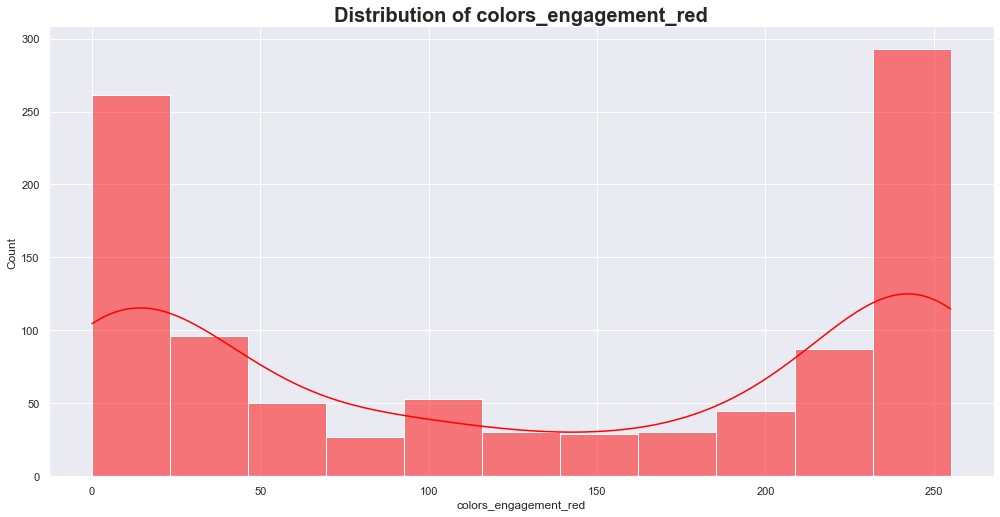

In [33]:
# histogram visual
# exploration = exploration()
fig = exploration.plot_hist(df,'colors_engagement_red','red')

# colors_engagement_green

In [34]:
# grouping by experiment and its count
experiment_groups = df.groupby(['colors_engagement_green']).agg({'colors_engagement_green': ['count']})
experiment_groups.columns = ['count']
experiment_groups = experiment_groups.sort_values(by='count', ascending=False)
experiment_groups = experiment_groups.reset_index()
experiment_groups.head()

,colors_engagement_green,count
0,0.0,124
1,254.0,98
2,10.0,26
3,94.0,23
4,251.0,18


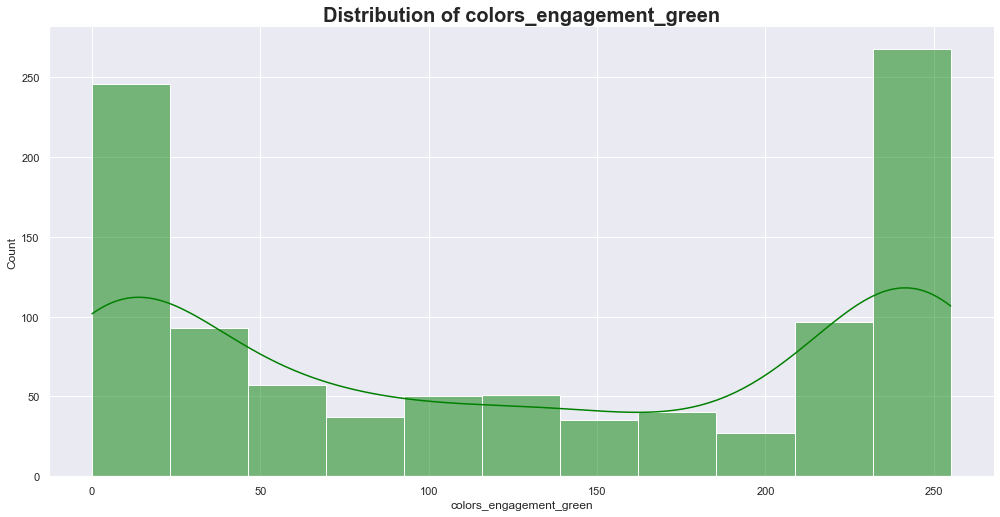

In [35]:
# histogram visual
# exploration = exploration()
fig = exploration.plot_hist(df,'colors_engagement_green','green')

# colors_engagement_blue

In [36]:
# grouping by experiment and its count
experiment_groups = df.groupby(['colors_engagement_blue']).agg({'colors_engagement_blue': ['count']})
experiment_groups.columns = ['count']
experiment_groups = experiment_groups.sort_values(by='count', ascending=False)
experiment_groups = experiment_groups.reset_index()
experiment_groups.head()

,colors_engagement_blue,count
0,0.0,127
1,254.0,111
2,16.0,29
3,94.0,24
4,250.0,21


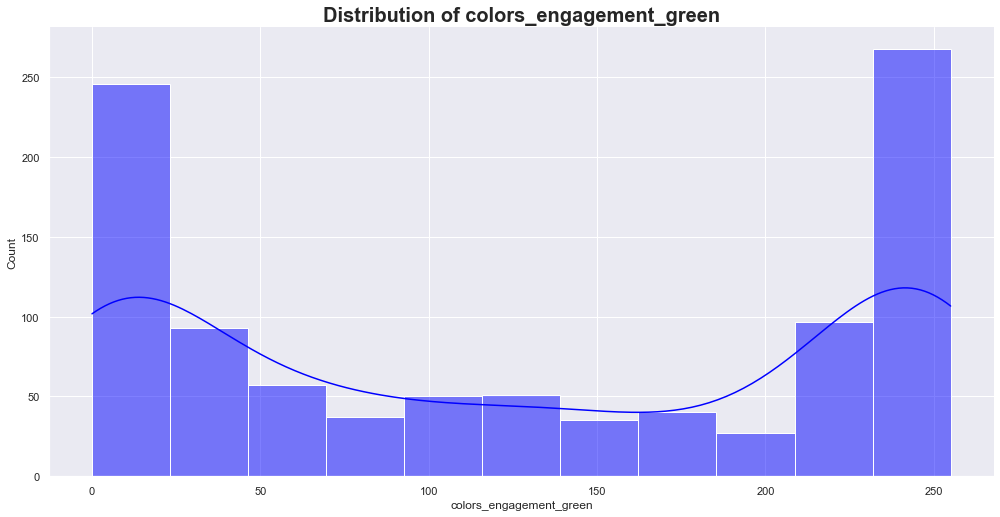

In [37]:
# histogram visual
# exploration = exploration()
fig = exploration.plot_hist(df,'colors_engagement_green','blue')

# colors_engagement_proportion

In [38]:
# grouping by experiment and its count
experiment_groups = df.groupby(['colors_engagement_proportion']).agg({'colors_engagement_proportion': ['count']})
experiment_groups.columns = ['count']
experiment_groups = experiment_groups.sort_values(by='count', ascending=False)
experiment_groups = experiment_groups.reset_index()
experiment_groups.head()

,colors_engagement_proportion,count
0,0.380435,11
1,0.423018,9
2,0.343750,9
3,0.218750,8
4,0.217391,7


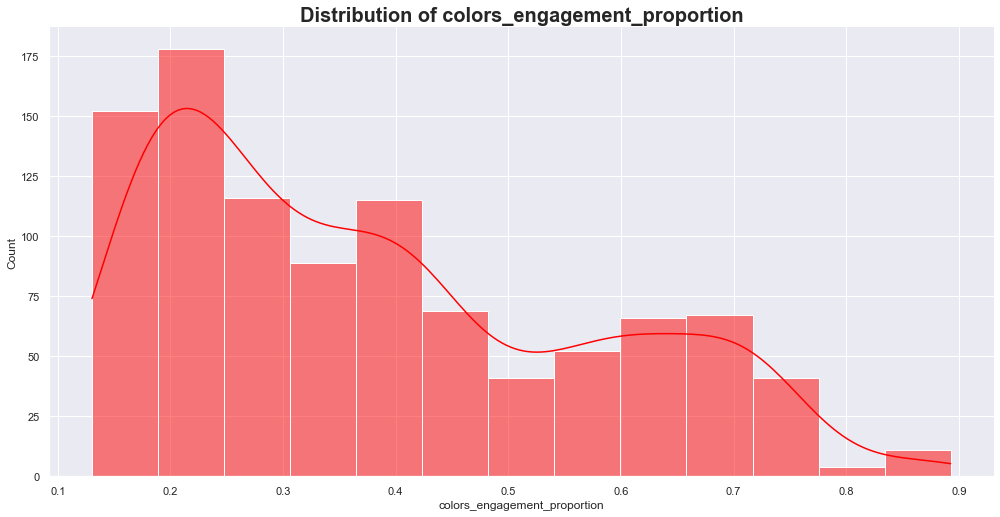

In [54]:
# histogram visual
# exploration = exploration()
fig = exploration.plot_hist(df,'colors_engagement_proportion','red')

# colors_engagement_saturation

In [40]:
# grouping by experiment and its count
experiment_groups = df.groupby(['colors_engagement_saturation']).agg({'colors_engagement_saturation': ['count']})
experiment_groups.columns = ['count']
experiment_groups = experiment_groups.sort_values(by='count', ascending=False)
experiment_groups = experiment_groups.reset_index()
experiment_groups.head()

,colors_engagement_saturation,count
0,0.000000,264
1,1.000000,63
2,0.230769,27
3,0.333333,16
4,0.222222,10


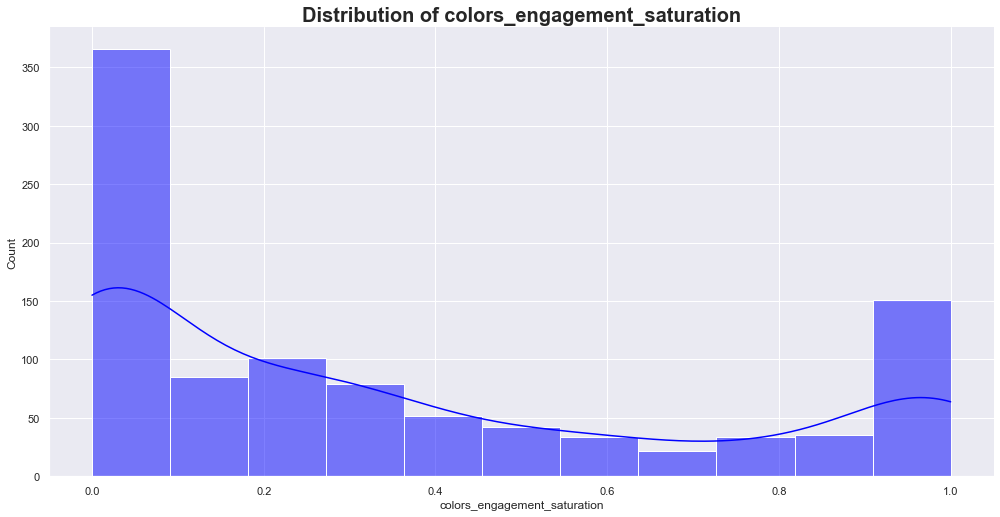

In [41]:
# histogram visual
# exploration = exploration()
fig = exploration.plot_hist(df,'colors_engagement_saturation','blue')

# colors_engagement_luminosity

In [42]:
# grouping by experiment and its count
experiment_groups = df.groupby(['colors_engagement_luminosity']).agg({'colors_engagement_luminosity': ['count']})
experiment_groups.columns = ['count']
experiment_groups = experiment_groups.sort_values(by='count', ascending=False)
experiment_groups = experiment_groups.reset_index()
experiment_groups.head()

,colors_engagement_luminosity,count
0,0.000000,102
1,0.996078,87
2,0.368627,23
3,0.050980,22
4,0.992157,12


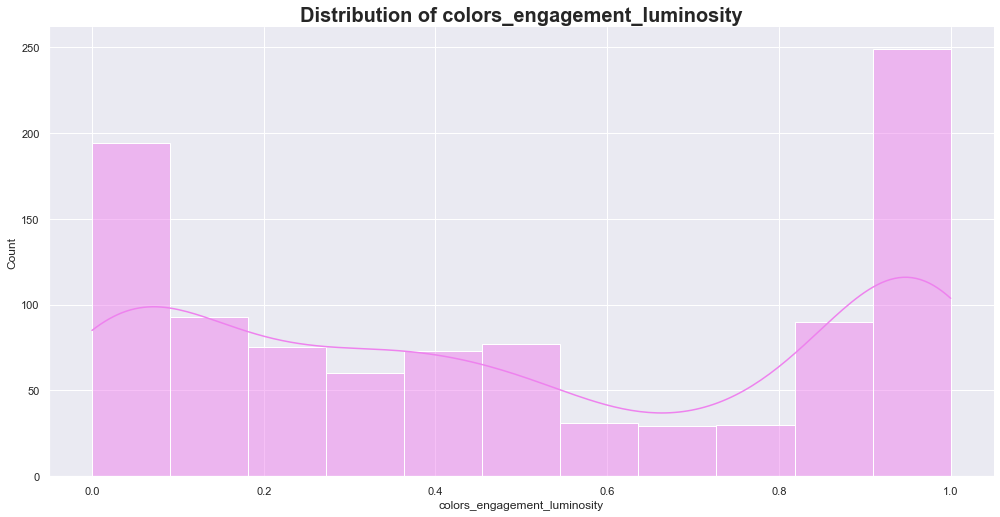

In [53]:
# histogram visual
# exploration = exploration()
fig = exploration.plot_hist(df,'colors_engagement_luminosity','violet')

# adunit_sizex

In [44]:
# grouping by experiment and its count
experiment_groups = df.groupby(['adunit_sizex']).agg({'adunit_sizex': ['count']})
experiment_groups.columns = ['count']
experiment_groups = experiment_groups.sort_values(by='count', ascending=False)
experiment_groups = experiment_groups.reset_index()
experiment_groups.head()

,adunit_sizex,count
0,600.0,1001


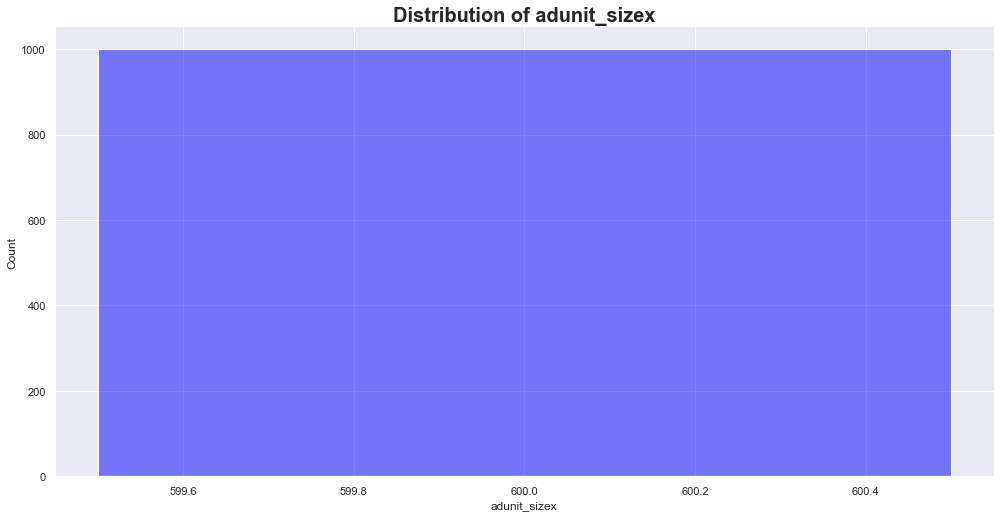

In [45]:
# histogram visual
# exploration = exploration()
fig = exploration.plot_hist(df,'adunit_sizex','blue')

# adunit_sizey

In [46]:
# grouping by experiment and its count
experiment_groups = df.groupby(['adunit_sizex']).agg({'adunit_sizex': ['count']})
experiment_groups.columns = ['count']
experiment_groups = experiment_groups.sort_values(by='count', ascending=False)
experiment_groups = experiment_groups.reset_index()
experiment_groups.head()

,adunit_sizex,count
0,600.0,1001


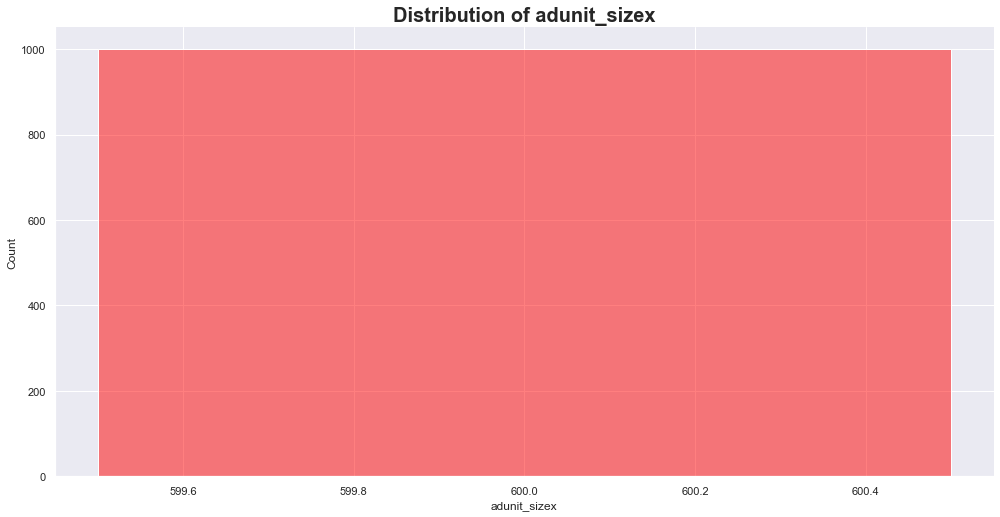

In [47]:
# histogram visual
# exploration = exploration()
fig = exploration.plot_hist(df,'adunit_sizex','red')

# correlation

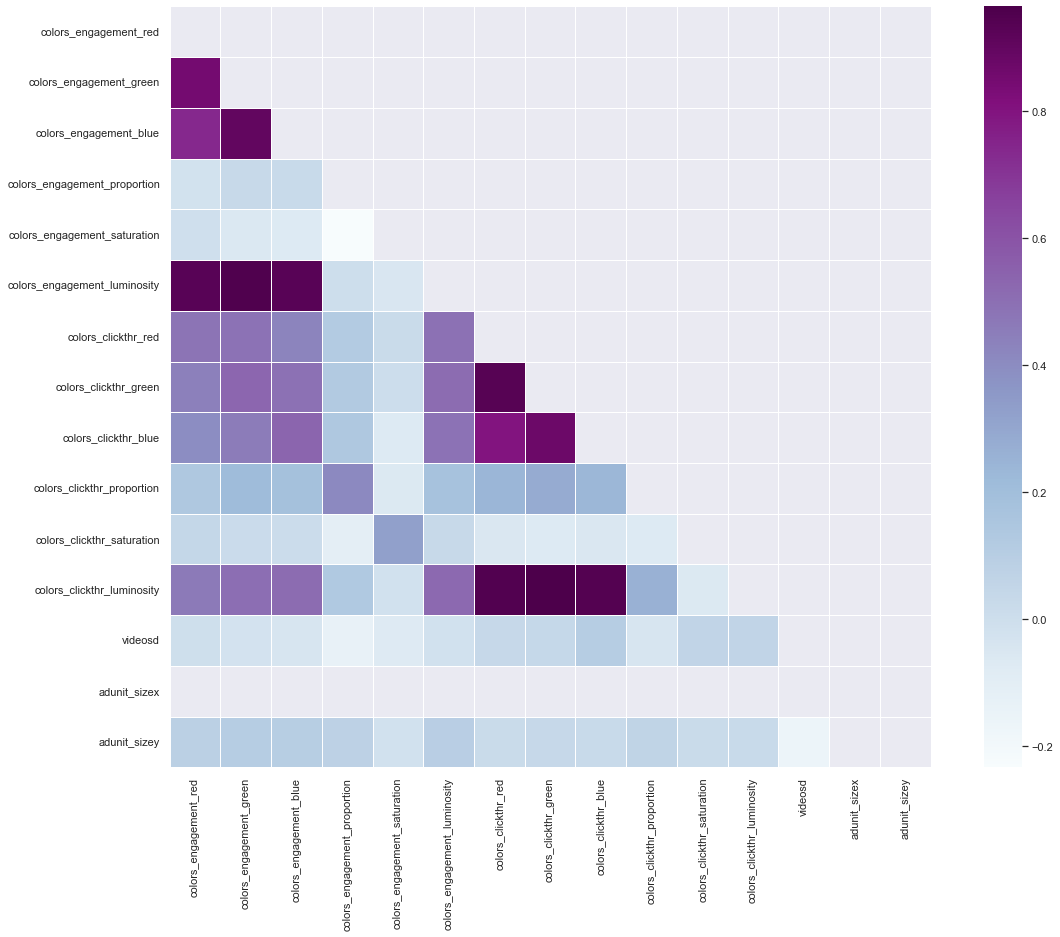

In [48]:
# Compute the correlation matrix 
corr_all = df.drop('game_key', axis = 1).corr()
# upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (19, 14))
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()